<FONT size="5.9pt"> **(3) SPIRALGORITHM: FOREGROUND & BACKGROUND UNCERTAINTIES**
</FONT> 

This jupyter notebook demonstrates how the uncertainty analysis included in the environmental LCA study of the SpiralG biorefinery was performed. 

This notebook buils on the previous notebooks (e.g., bioref_model, LCA) in which the environmental impacts of the SpiralG biorefinery were assessed and the main contributors identified. This code should be run in a Brightway project containing the biosphere databases, the ecoinvent database - the version 3.6 is used here - and the foreground databases used in previous notebooks.

The uncertainty analysis consists of the following steps: 
1) Export the foreground databases as **Excel files** that can be manually updated (e.g. to add uncertainty information).
2) Add the uncertainty information at exchange level using the Pedigree matrix approach,
3) Importing the uncertainty information into the foreground databases and calculate the loc and scale parameters considering Lognormal distributions,
4) Using **Wurst** to modify remove all uncertainty information from the ecoinvent database,
5) Perform the **Monte Carlo** simulations using the foregound databases and ecoinvent with or without uncertainty (3 scenarios were compared).

## Set up the directories

In [7]:
import os
import sys
import numpy as np

# Set up the directories in which the modules to be loaded are saved [to be changed]
mdir_list = ['/home/leabraud/Documents/spiralgorithm/lca_calc',
             '/home/leabraud/Documents/spiralgorithm/uncertainties',
             '/home/leabraud/Documents/spiralgorithm/bioref2lca',
             '/home/leabraud/Documents/spiralgorithm/packages/pedigree/pedigree_matrix',
             '/home/leabraud/Documents/spiralgorithm/packages/stats_array/stats_array']

for mdir in mdir_list: 
    if mdir not in sys.path:
        sys.path.insert(0,mdir)
        
# Set up the working directory in which the results will be saved [to be changed]
wdir = '/home/leabraud/Documents/LCASpiralg'
 
# Set up the recipe directory in which the recipes for each figure are saved [to be changed]
rdir = '/home/leabraud/Documents/LCASpiralg/recipes'

# Set up the directory in which the databases are saved [to be changed]
dbdir = '/home/leabraud/Documents/LCASpiralg/databases'

print(sys.path)

['/home/leabraud/Documents/spiralgorithm/bioref2lca', '/home/leabraud/Documents/spiralgorithm/packages/stats_array/stats_array', '/home/leabraud/Documents/spiralgorithm/packages/pedigree/pedigree_matrix', '/home/leabraud/Documents/spiralgorithm/uncertainties', '/home/leabraud/Documents/spiralgorithm/lca_calc', '/home/leabraud/Documents/LCASpiralg/notebooks', '/home/leabraud/miniconda3/envs/bw2/lib/python311.zip', '/home/leabraud/miniconda3/envs/bw2/lib/python3.11', '/home/leabraud/miniconda3/envs/bw2/lib/python3.11/lib-dynload', '', '/home/leabraud/miniconda3/envs/bw2/lib/python3.11/site-packages']


## Select or create a Brightway project

In [2]:
from master import prep_dir, import_databases, run

recipe = prep_dir (wdir = wdir, rdir = rdir, recipe_name = 'recipe_fig2_period2.yml')
recipe = import_databases (recipe, wdir)


 --------------
| SPIRALGORITHM |
 --------------


> PREPARATION:
  ------------
Working directory: /home/leabraud/Documents/LCASpiralg
Project directory: /home/leabraud/Documents/LCASpiralg/projects
Recipe directory: /home/leabraud/Documents/LCASpiralg/recipes


> INITIATE LCA ANALYSIS:
  ----------------------
Using environment variable BRIGHTWAY2_DIR for data directory:
/home/leabraud/Documents/LCASpiralg/projects

>>> BW2 PROJECT:

Current project directory: /home/leabraud/Documents/LCASpiralg/projects/default.c21f969b5f03d33d43e04f8f136e7682 
Brightway2 projects manager with 2 objects:
	default
	lcaspiralg
Use `projects.report()` to get a report on all projects.
Create a new project? y/[n]: n
Choose a working project [default]: lcaspiralg


Writing activities to SQLite3 database:



Current project: lcaspiralg

>>> IMPORT BIOSPHERE 3:

biosphere3 has already been imported in the project.

>>> IMPORT ECOINVENT 3.6:

/home/leabraud/Documents/LCASpiralg/databases/ecoinvent_3.6_cut-off_ecoSpold02_complete/datasets
ecoinvent_3.6_cutoff has already been imported

>>> IMPORT FOREGROUND DATABASE: DB_TRANSPORT_S12TECH_1 

/home/leabraud/Documents/LCASpiralg/databases/db_transport_S12tech_1.bw2package


0% [##] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00
Writing activities to SQLite3 database:


Title: Writing activities to SQLite3 database:
  Started: 05/14/2024 14:14:52
  Finished: 05/14/2024 14:14:52
  Total time elapsed: 00:00:00
  CPU %: 0.00
  Memory %: 1.25

>>> IMPORT FOREGROUND DATABASE: DB_TRANSPORT_S12TECH_2 

/home/leabraud/Documents/LCASpiralg/databases/db_transport_S12tech_2.bw2package


0% [##] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00
Writing activities to SQLite3 database:


Title: Writing activities to SQLite3 database:
  Started: 05/14/2024 14:14:52
  Finished: 05/14/2024 14:14:52
  Total time elapsed: 00:00:00
  CPU %: 0.00
  Memory %: 1.25

>>> IMPORT FOREGROUND DATABASE: DB_TRANSPORT_S23TECH_1 

/home/leabraud/Documents/LCASpiralg/databases/db_transport_S23tech_1.bw2package


0% [##] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00
Writing activities to SQLite3 database:


Title: Writing activities to SQLite3 database:
  Started: 05/14/2024 14:14:52
  Finished: 05/14/2024 14:14:52
  Total time elapsed: 00:00:00
  CPU %: 449.00
  Memory %: 1.25

>>> IMPORT FOREGROUND DATABASE: DB_TRANSPORT_S23TECH_2 

/home/leabraud/Documents/LCASpiralg/databases/db_transport_S23tech_2.bw2package


0% [##] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00
Writing activities to SQLite3 database:


Title: Writing activities to SQLite3 database:
  Started: 05/14/2024 14:14:52
  Finished: 05/14/2024 14:14:52
  Total time elapsed: 00:00:00
  CPU %: 0.00
  Memory %: 1.25

>>> IMPORT FOREGROUND DATABASE: DB_INFRASTRUCTURESTECH_1 

/home/leabraud/Documents/LCASpiralg/databases/db_infrastructurestech_1.bw2package


0% [##] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


Title: Writing activities to SQLite3 database:
  Started: 05/14/2024 14:14:53
  Finished: 05/14/2024 14:14:53
  Total time elapsed: 00:00:00
  CPU %: 0.00
  Memory %: 1.25

>>> IMPORT FOREGROUND DATABASE: DB_INFRASTRUCTURESTECH_2 

/home/leabraud/Documents/LCASpiralg/databases/db_infrastructurestech_2.bw2package


Writing activities to SQLite3 database:
0% [##] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00
Writing activities to SQLite3 database:


Title: Writing activities to SQLite3 database:
  Started: 05/14/2024 14:14:53
  Finished: 05/14/2024 14:14:53
  Total time elapsed: 00:00:00
  CPU %: 677.90
  Memory %: 1.25

>>> IMPORT FOREGROUND DATABASE: DB_OPERATIONTECH_1 

/home/leabraud/Documents/LCASpiralg/databases/db_operationtech_1.bw2package


0% [##] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


Title: Writing activities to SQLite3 database:
  Started: 05/14/2024 14:14:53
  Finished: 05/14/2024 14:14:53
  Total time elapsed: 00:00:00
  CPU %: 0.00
  Memory %: 1.25


Writing activities to SQLite3 database:



>>> IMPORT FOREGROUND DATABASE: DB_OPERATIONTECH_2 

/home/leabraud/Documents/LCASpiralg/databases/db_operationtech_2.bw2package


0% [##] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


Title: Writing activities to SQLite3 database:
  Started: 05/14/2024 14:14:53
  Finished: 05/14/2024 14:14:53
  Total time elapsed: 00:00:00
  CPU %: 0.00
  Memory %: 1.25


Writing activities to SQLite3 database:



>>> IMPORT FOREGROUND DATABASE: DB_S1TECH_1 

/home/leabraud/Documents/LCASpiralg/databases/db_S1tech_1.bw2package


0% [#######] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


Title: Writing activities to SQLite3 database:
  Started: 05/14/2024 14:14:53
  Finished: 05/14/2024 14:14:53
  Total time elapsed: 00:00:00
  CPU %: 0.00
  Memory %: 1.25


Writing activities to SQLite3 database:



>>> IMPORT FOREGROUND DATABASE: DB_S1TECH_2 

/home/leabraud/Documents/LCASpiralg/databases/db_S1tech_2.bw2package


0% [#######] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


Title: Writing activities to SQLite3 database:
  Started: 05/14/2024 14:14:53
  Finished: 05/14/2024 14:14:53
  Total time elapsed: 00:00:00
  CPU %: 0.00
  Memory %: 1.25

>>> IMPORT FOREGROUND DATABASE: DB_S2TECH_1 

/home/leabraud/Documents/LCASpiralg/databases/db_S2tech_1.bw2package


Writing activities to SQLite3 database:
0% [##########] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


Title: Writing activities to SQLite3 database:
  Started: 05/14/2024 14:14:53
  Finished: 05/14/2024 14:14:53
  Total time elapsed: 00:00:00
  CPU %: 0.00
  Memory %: 1.26

>>> IMPORT FOREGROUND DATABASE: DB_S2TECH_2 

/home/leabraud/Documents/LCASpiralg/databases/db_S2tech_2.bw2package


Writing activities to SQLite3 database:
0% [##########] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


Title: Writing activities to SQLite3 database:
  Started: 05/14/2024 14:14:53
  Finished: 05/14/2024 14:14:53
  Total time elapsed: 00:00:00
  CPU %: 261.50
  Memory %: 1.26


Writing activities to SQLite3 database:



>>> IMPORT FOREGROUND DATABASE: DB_S3TECH_1 

/home/leabraud/Documents/LCASpiralg/databases/db_S3tech_1.bw2package


0% [#######] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


Title: Writing activities to SQLite3 database:
  Started: 05/14/2024 14:14:53
  Finished: 05/14/2024 14:14:53
  Total time elapsed: 00:00:00
  CPU %: 0.00
  Memory %: 1.26


Writing activities to SQLite3 database:



>>> IMPORT FOREGROUND DATABASE: DB_S3TECH_2 

/home/leabraud/Documents/LCASpiralg/databases/db_S3tech_2.bw2package


0% [#######] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


Title: Writing activities to SQLite3 database:
  Started: 05/14/2024 14:14:53
  Finished: 05/14/2024 14:14:53
  Total time elapsed: 00:00:00
  CPU %: 0.00
  Memory %: 1.26


 All the background and foreground databases were imported. 

 Databases dictionary with 16 object(s):
	biosphere3
	db_S1tech_1
	db_S1tech_2
	db_S2tech_1
	db_S2tech_2
	db_S3tech_1
	db_S3tech_2
	db_infrastructurestech_1
	db_infrastructurestech_2
	db_operationtech_1
	db_operationtech_2
	db_transport_S12tech_1
	db_transport_S12tech_2
	db_transport_S23tech_1
	db_transport_S23tech_2
	ecoinvent_3.6_cutoff


In [3]:
import brightway2 as bw

list(bw.databases)

['biosphere3',
 'ecoinvent_3.6_cutoff',
 'db_S1tech_1',
 'db_S1tech_2',
 'db_S2tech_1',
 'db_S2tech_2',
 'db_S3tech_1',
 'db_S3tech_2',
 'db_transport_S12tech_1',
 'db_transport_S12tech_2',
 'db_transport_S23tech_1',
 'db_transport_S23tech_2',
 'db_infrastructurestech_1',
 'db_infrastructurestech_2',
 'db_operationtech_1',
 'db_operationtech_2']

In [42]:
# del bw.databases['S123_tech1_u']
# del bw.databases['S123_tech1_nu']
# del bw.databases['S123_tech2_nu']
# del bw.databases['S123_tech2_u']

## Add the uncertainty information to the foreground databases

### Export the foreground databases as Excel files

The foreground databases are exported as Excel files. Each Excel file corresponds to a subsystem. Each sheet corresponds to an activity. The Excel sheets contain the following information: 
- activity name
- amount 
- unit
- type: production, technosphere, biosphere
- location
- databases
- code
- uncertainty type: 0,1, 2 etc. (here considered as lognormal)
- pedigree: e.g. (2,1,5,1,1)
- negative: True or False
- loc: calculate as the ln of the amount
- scale: according to the calculations in other notebook.

The columns "uncertainty type", "pedigree", and "negative" columns need to be filled in manually. The Excel files are then imported back in the form of BW databases. Each exchange is now associated with uncertainty information. The loc and scale are then calculate in order to get all the informaiton required to perform a MC analysis on the foreground and background databases.

In [8]:
from excel_io import Export2Excel

recipe_name = 'recipe_uncertainty_analysis.yml'

Export2Excel (dbdir, rdir, recipe_name)

Directory: /home/leabraud/Documents/LCASpiralg/recipes/recipe_uncertainty_analysis.yml
Database db_S1tech_1 exported as an Excel file.
Database db_S1tech_2 exported as an Excel file.
Database db_S2tech_1 exported as an Excel file.
Database db_S2tech_2 exported as an Excel file.
Database db_S3tech_1 exported as an Excel file.
Database db_S3tech_2 exported as an Excel file.
Database db_transport_S12tech_1 exported as an Excel file.
Database db_transport_S12tech_2 exported as an Excel file.
Database db_transport_S23tech_1 exported as an Excel file.
Database db_transport_S23tech_2 exported as an Excel file.
Database db_infrastructurestech_1 exported as an Excel file.
Database db_infrastructurestech_2 exported as an Excel file.
Database db_operationtech_1 exported as an Excel file.
Database db_operationtech_2 exported as an Excel file.


### Add the uncertainty information to the foreground data

The addition of the uncertainty information was performed manually by filling up the "pedigree" and "negative" columns for each activity (i.e. Excel sheet) of the Excel files exported. The Pedigree matrix approach described by Ciroth et al. (2016) was used to attribute a score (between 1 and 5) to each of the five indicators for each process. The scores were listed in the corresponding cell in the Excel sheets. The column "negative" is of particular importance to identify exchanges for which the amount is negative (e.g. waste treatment processes).


**Table 1:** Pedigree matrix (reproduced from Ciroth et al. 2016)
| Indicator score | 1 | 2 | 3 | 4 | 5 |
| :- | :-: | :-: | :-: | :-: | :-: |
| **Reliability** | Verified data based on measurements | Verified data partly based on assumptions or non-verified data based on measurements | Non-verified data partly based on qualified estimates | Qualified estimate (e.g. by industrial expert) | Non-qualified estimate |
| **Completeness** | Representative data from all sited relevant for the market considered, over an adequate period even out normal fluctuations | Representative data from >50 % of the sites relevant for the market considered, over an adequate period to even out normal fluctuations | Representative data from only some sited (≪50 %) relevant for the market considered or >50 % of sites but from shorter periods | Representative data from only one site relevant for the market considered or some sites but from shorter periods | Representativeness unknown or data from a small number of sites and from shorter periods |
| **Temporal correlation** | Less than 3 years of difference to the time period of the dataset | Less than 6 years of difference of the time period of the dataset | Less than 10 years of difference to the time period of the dataset | Less than 15 years of difference to the time period of the dataset | Age of data unknown or more than 15 years of difference to the time period of the dataset |
| **Geographical correlation** | Data from area under study | Average data from larger area in which the area under study is included | Data from area with similar production conditions | Data from area with slightly similar production conditions | Data from unknown or distinctly different area (North America instead of Middle East, OECD-Europe instead of Russia) |
| **Further technological correlation** | Data from enterprises, processes and materials under study | Data from processes and materials under study (i.e. identical technology) but from different enterprises | Data from processes and materials under study from different technology | Data on related processes or materials | Data on related processes on laboratory scale or from different technology |

The details of the indicator scores attributed to each exchange and the justification are shown in the Excel files. 

### Import the uncertainty information from the Excel file and add them to the foreground databases

Lognormal distributions were assumed for all the exchanges in the foreground databases. The Pedigree matrix indicators were used to calculated the mean (loc) and standard deviation (scale). 

**Calculation of the mean (loc):** The mean corresponds to the logarithm of the exchange amount. In the case of negative amounts for exchanges, the absolute value of the amount was used to calculate the loc. 

**Calculation of the standard deviation (scale):** The standard deviation was calculated based on the uncertainty factors for the five Pedigree matrix indicators (see below). The values were extracted from Ciroth et al. (2016). The maximum value of 2.8 was attributed to the indicator score "5" for "reliability", "completeness", and "geographical correlation". The pedigree matrix functions associated with Brighwtay were used. THe version described by Gustave Coste was used in this study: https://github.com/sc-gcoste/pedigree_matrix/blob/main/pedigree_matrix/pm.py. In order to access the functions, the code was downloaded from Github and retrieved as follows.

In [9]:
from data import uncertainty_factors

uncertainty_factors['version_0']

{'reliability': (1.0, 1.54, 1.61, 1.69, 2.8),
 'completeness': (1.0, 1.03, 1.04, 1.08, 2.8),
 'temporal correlation': (1.0, 1.03, 1.1, 1.19, 1.29),
 'geographical correlation': (1.0, 1.04, 1.08, 1.11, 1.11),
 'further technological correlation': (1.0, 1.18, 1.65, 2.08, 2.8)}

The uncertainty factors are can be retrieved from a string or numbers. Here, they were retrieved from numbers. The original function was modified so that the basic uncertainty factor the value of 1 is not automatically assigned.
The uncertainty of each process is defined as the geometric standard deviation (GSD):

$$
GSD = e^\sqrt{ln{U_R}^2 + ln{U_C}^2 + ln{U_T}^2 + ln{U_G}^2 + ln{U_F}^2 + ln{U_b}^2}
$$

with: 
- $U_R$: uncertainty factor of the "reliability" indicator, 
- $U_C$: uncertainty factor of the "completeness" indicator, 
- $U_T$: uncertainty factor of the "technological correction" indicator, 
- $U_G$: uncertainty factor of the "geographical correlation" indicator, 
- $U_F$: uncertainty factor of the "further technological correlation" indicator, 
- $U_b$: the basic uncertainty factor for processes. 

In [10]:
from uncertainty import UpdateUncertainty

#as_geometric_sigma = False
#UpdateUncertainty (rdir, recipe_name, dbdir, as_geometric_sigma)

UpdateUncertainty (rdir, recipe_name, dbdir)

Writing activities to SQLite3 database:



Updating uncertainty information in the database db_S1tech_1


0% [#######] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


Title: Writing activities to SQLite3 database:
  Started: 05/14/2024 14:18:02
  Finished: 05/14/2024 14:18:02
  Total time elapsed: 00:00:00
  CPU %: 0.00
  Memory %: 1.31

Activity name: S1A1Cultivation
Got the activity 'S1A1Cultivation' (unit, GLO, None)

Exchange: 1 unit 'S1A1Cultivation' (unit, GLO, None) to 'S1A1Cultivation' (unit, GLO, None)>

The uncertainty type was not set to 2 (lognormal)! Check the value in the Excel file!

Information added: 
- uncertainty type: 2 
- loc: 0.0 
- scale: 0.02449489742783178

Exchange: 121.11023243506816 kilogram 'market for sodium bicarbonate' (kilogram, GLO, None) to 'S1A1Cultivation' (unit, GLO, None)>


Information added: 
- uncertainty type: 2 
- loc: 4.796701142737361 
- scale: 0.02449489742783178

Exchange: 20.9096430597768 kilogram 'market for potassium nitrate' (kilogram, GLO, None) to 'S1A1Cultivation' (unit, GLO, None)>


Information added: 
- uncertainty type: 2 
- loc: 3.040210442982877 
- scale: 0.02449489742783178

Exchange: 0.7

Writing activities to SQLite3 database:



Exchange: 69.84913900673824 kilogram 'tap water production, underground water without treatment' (kilogram, Europe without Switzerland, None) to 'S1A4Shaping' (unit, GLO, None)>


Information added: 
- uncertainty type: 2 
- loc: 4.246337759309725 
- scale: 0.034641016151377546

Exchange: -0.06984913900673824 cubic meter 'treatment of wastewater, average, capacity 1E9l/year' (cubic meter, Europe without Switzerland, None) to 'S1A4Shaping' (unit, GLO, None)>


Information added: 
- uncertainty type: 2 
- loc: -2.6614175196724124 
- scale: 0.034641016151377546

Activity name: S1A5Drying
Got the activity 'S1A5Drying' (unit, GLO, None)

Exchange: 1 unit 'S1A5Drying' (unit, GLO, None) to 'S1A5Drying' (unit, GLO, None)>

The uncertainty type was not set to 2 (lognormal)! Check the value in the Excel file!

Information added: 
- uncertainty type: 2 
- loc: 0.0 
- scale: 0.02449489742783178

Exchange: 326.44003102618586 kilowatt hour 'market for electricity, medium voltage' (kilowatt hour, IT

0% [#######] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


Title: Writing activities to SQLite3 database:
  Started: 05/14/2024 14:18:03
  Finished: 05/14/2024 14:18:03
  Total time elapsed: 00:00:00
  CPU %: 553.50
  Memory %: 1.32

Activity name: S1A1Cultivation
Got the activity 'S1A1Cultivation' (unit, GLO, None)

Exchange: 1 unit 'S1A1Cultivation' (unit, GLO, None) to 'S1A1Cultivation' (unit, GLO, None)>

The uncertainty type was not set to 2 (lognormal)! Check the value in the Excel file!

Information added: 
- uncertainty type: 2 
- loc: 0.0 
- scale: 0.02449489742783178

Exchange: 39.86788406119944 kilogram 'market for sodium bicarbonate' (kilogram, GLO, None) to 'S1A1Cultivation' (unit, GLO, None)>


Information added: 
- uncertainty type: 2 
- loc: 3.6855710890343474 
- scale: 0.02449489742783178

Exchange: 45.531566755130285 kilogram 'market for potassium nitrate' (kilogram, GLO, None) to 'S1A1Cultivation' (unit, GLO, None)>


Information added: 
- uncertainty type: 2 
- loc: 3.818405860244422 
- scale: 0.02449489742783178
The activi

Writing activities to SQLite3 database:


Got the activity 'S1A6Packaging' (unit, GLO, None)

Exchange: 1 unit 'S1A6Packaging' (unit, GLO, None) to 'S1A6Packaging' (unit, GLO, None)>

The uncertainty type was not set to 2 (lognormal)! Check the value in the Excel file!

Information added: 
- uncertainty type: 2 
- loc: 0.0 
- scale: 0.02449489742783178

Exchange: 0.35370253686607306 kilogram 'market for polyethylene terephthalate, granulate, amorphous' (kilogram, GLO, None) to 'S1A6Packaging' (unit, GLO, None)>


Information added: 
- uncertainty type: 2 
- loc: -1.0392990104298045 
- scale: 0.02449489742783178
Done!

Updating uncertainty information in the database db_S2tech_1


0% [##########] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


Title: Writing activities to SQLite3 database:
  Started: 05/14/2024 14:18:03
  Finished: 05/14/2024 14:18:03
  Total time elapsed: 00:00:00
  CPU %: 0.00
  Memory %: 1.33

Activity name: S2A1Maceration
Got the activity 'S2A1Maceration' (unit, GLO, None)

Exchange: 1 unit 'S2A1Maceration' (unit, GLO, None) to 'S2A1Maceration' (unit, GLO, None)>

The uncertainty type was not set to 2 (lognormal)! Check the value in the Excel file!

Information added: 
- uncertainty type: 2 
- loc: 0.0 
- scale: 0.02449489742783178

Exchange: 3.1023834578215115 kilowatt hour 'market for electricity, medium voltage' (kilowatt hour, FR, None) to 'S2A1Maceration' (unit, GLO, None)>


Information added: 
- uncertainty type: 2 
- loc: 1.1321706734334709 
- scale: 0.02449489742783178

Exchange: 1441.9068691074501 kilogram 'market for tap water' (kilogram, Europe without Switzerland, None) to 'S2A1Maceration' (unit, GLO, None)>


Information added: 
- uncertainty type: 2 
- loc: 7.273721731229023 
- scale: 0.02

/home/leabraud/Documents/spiralgorithm/uncertainties/pedigree.py:15: RuntimeWarning: divide by zero encountered in log
  return np.log(abs(mean))


Got the activity 'S2A4Ultrafiltration1' (unit, GLO, None)

Exchange: 1 unit 'S2A4Ultrafiltration1' (unit, GLO, None) to 'S2A4Ultrafiltration1' (unit, GLO, None)>

The uncertainty type was not set to 2 (lognormal)! Check the value in the Excel file!

Information added: 
- uncertainty type: 2 
- loc: 0.0 
- scale: 0.02449489742783178

Exchange: 100.66244883976445 kilowatt hour 'market for electricity, medium voltage' (kilowatt hour, FR, None) to 'S2A4Ultrafiltration1' (unit, GLO, None)>


Information added: 
- uncertainty type: 2 
- loc: 4.611772828886237 
- scale: 0.02449489742783178

Exchange: 2457.390287489118 kilogram 'market for tap water' (kilogram, Europe without Switzerland, None) to 'S2A4Ultrafiltration1' (unit, GLO, None)>


Information added: 
- uncertainty type: 2 
- loc: 7.806855207073222 
- scale: 0.02449489742783178

Exchange: 2.818102047086059 kilogram 'market for sodium hydroxide, without water, in 50% solution state' (kilogram, GLO, None) to 'S2A4Ultrafiltration1' (unit

Writing activities to SQLite3 database:


Done!

Updating uncertainty information in the database db_S2tech_2


0% [##########] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


Title: Writing activities to SQLite3 database:
  Started: 05/14/2024 14:18:04
  Finished: 05/14/2024 14:18:04
  Total time elapsed: 00:00:00
  CPU %: 275.20
  Memory %: 1.33

Activity name: S2A1Maceration
Got the activity 'S2A1Maceration' (unit, GLO, None)

Exchange: 1 unit 'S2A1Maceration' (unit, GLO, None) to 'S2A1Maceration' (unit, GLO, None)>

The uncertainty type was not set to 2 (lognormal)! Check the value in the Excel file!

Information added: 
- uncertainty type: 2 
- loc: 0.0 
- scale: 0.02449489742783178

Exchange: 0.3256700653018423 kilowatt hour 'market for electricity, medium voltage' (kilowatt hour, FR, None) to 'S2A1Maceration' (unit, GLO, None)>


Information added: 
- uncertainty type: 2 
- loc: -1.121870479729956 
- scale: 0.02449489742783178

Exchange: 1172.9376494586522 kilogram 'market for tap water' (kilogram, Europe without Switzerland, None) to 'S2A1Maceration' (unit, GLO, None)>


Information added: 
- uncertainty type: 2 
- loc: 7.0672666924740035 
- scale: 0

/home/leabraud/Documents/spiralgorithm/uncertainties/pedigree.py:15: RuntimeWarning: divide by zero encountered in log
  return np.log(abs(mean))
/home/leabraud/Documents/spiralgorithm/uncertainties/pedigree.py:15: RuntimeWarning: divide by zero encountered in log
  return np.log(abs(mean))



Exchange: 206.95388747238874 kilowatt hour 'market for electricity, medium voltage' (kilowatt hour, FR, None) to 'S2A4Ultrafiltration1' (unit, GLO, None)>


Information added: 
- uncertainty type: 2 
- loc: 5.332496002615504 
- scale: 0.02449489742783178

Exchange: 7046.292737718285 kilogram 'market for tap water' (kilogram, Europe without Switzerland, None) to 'S2A4Ultrafiltration1' (unit, GLO, None)>


Information added: 
- uncertainty type: 2 
- loc: 8.860256904691322 
- scale: 0.02449489742783178

Exchange: 9.528418354935287 kilogram 'market for sodium hydroxide, without water, in 50% solution state' (kilogram, GLO, None) to 'S2A4Ultrafiltration1' (unit, GLO, None)>


Information added: 
- uncertainty type: 2 
- loc: 2.254278739037781 
- scale: 0.02449489742783178

Exchange: 0.16682752675307572 kilogram 'market for hydrogen peroxide, without water, in 50% solution state' (kilogram, RER, None) to 'S2A4Ultrafiltration1' (unit, GLO, None)>


Information added: 
- uncertainty type: 2 

Writing activities to SQLite3 database:


Done!

Updating uncertainty information in the database db_S3tech_1


0% [#######] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


Title: Writing activities to SQLite3 database:
  Started: 05/14/2024 14:18:05
  Finished: 05/14/2024 14:18:05
  Total time elapsed: 00:00:00
  CPU %: 461.80
  Memory %: 1.33

Activity name: S3A1Extraction
Got the activity 'S3A1Extraction' (unit, GLO, None)

Exchange: 1 unit 'S3A1Extraction' (unit, GLO, None) to 'S3A1Extraction' (unit, GLO, None)>

The uncertainty type was not set to 2 (lognormal)! Check the value in the Excel file!

Information added: 
- uncertainty type: 2 
- loc: 0.0 
- scale: 0.02449489742783178

Exchange: 301.52576513017664 kilowatt hour 'market for electricity, medium voltage' (kilowatt hour, FR, None) to 'S3A1Extraction' (unit, GLO, None)>


Information added: 
- uncertainty type: 2 
- loc: 5.708855469000874 
- scale: 0.02449489742783178

Exchange: 959.4988240386452 kilogram 'market for tap water' (kilogram, Europe without Switzerland, None) to 'S3A1Extraction' (unit, GLO, None)>


Information added: 
- uncertainty type: 2 
- loc: 6.866411089848927 
- scale: 0.02

Writing activities to SQLite3 database:



Exchange: 7.938436528289601 kilogram 'market for polyethylene terephthalate, granulate, amorphous' (kilogram, GLO, None) to 'S3A5Packaging' (unit, GLO, None)>


Information added: 
- uncertainty type: 2 
- loc: 2.0717163450748077 
- scale: 0.02449489742783178

Activity name: S3A6STabilisation
Got the activity 'S3A6STabilisation' (unit, GLO, None)

Exchange: 1 unit 'S3A6STabilisation' (unit, GLO, None) to 'S3A6STabilisation' (unit, GLO, None)>

The uncertainty type was not set to 2 (lognormal)! Check the value in the Excel file!

Information added: 
- uncertainty type: 2 
- loc: 0.0 
- scale: 0.02449489742783178

Exchange: 1.1541374467005077 kilogram 'market for potassium hydroxide' (kilogram, GLO, None) to 'S3A6STabilisation' (unit, GLO, None)>


Information added: 
- uncertainty type: 2 
- loc: 0.1433532655866798 
- scale: 0.02449489742783178
Done!

Updating uncertainty information in the database db_S3tech_2


0% [#######] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


Title: Writing activities to SQLite3 database:
  Started: 05/14/2024 14:18:06
  Finished: 05/14/2024 14:18:06
  Total time elapsed: 00:00:00
  CPU %: 0.00
  Memory %: 1.33

Activity name: S3A1Extraction
Got the activity 'S3A1Extraction' (unit, GLO, None)

Exchange: 1 unit 'S3A1Extraction' (unit, GLO, None) to 'S3A1Extraction' (unit, GLO, None)>

The uncertainty type was not set to 2 (lognormal)! Check the value in the Excel file!

Information added: 
- uncertainty type: 2 
- loc: 0.0 
- scale: 0.02449489742783178

Exchange: 33.093727226691044 kilowatt hour 'market for electricity, medium voltage' (kilowatt hour, FR, None) to 'S3A1Extraction' (unit, GLO, None)>


Information added: 
- uncertainty type: 2 
- loc: 3.49934375465613 
- scale: 0.02449489742783178

Exchange: 505.30226031125244 kilogram 'market for tap water' (kilogram, Europe without Switzerland, None) to 'S3A1Extraction' (unit, GLO, None)>


Information added: 
- uncertainty type: 2 
- loc: 6.225156785494374 
- scale: 0.0244

Writing activities to SQLite3 database:



Activity name: S3A6STabilisation
Got the activity 'S3A6STabilisation' (unit, GLO, None)

Exchange: 1 unit 'S3A6STabilisation' (unit, GLO, None) to 'S3A6STabilisation' (unit, GLO, None)>

The uncertainty type was not set to 2 (lognormal)! Check the value in the Excel file!

Information added: 
- uncertainty type: 2 
- loc: 0.0 
- scale: 0.02449489742783178

Exchange: 1.1541374467005077 kilogram 'market for potassium hydroxide' (kilogram, GLO, None) to 'S3A6STabilisation' (unit, GLO, None)>


Information added: 
- uncertainty type: 2 
- loc: 0.1433532655866798 
- scale: 0.02449489742783178
Done!

Updating uncertainty information in the database db_transport_S12tech_1


0% [##] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


Title: Writing activities to SQLite3 database:
  Started: 05/14/2024 14:18:06
  Finished: 05/14/2024 14:18:06
  Total time elapsed: 00:00:00
  CPU %: 1694.30
  Memory %: 1.33

Activity name: S12A8Transport
Got the activity 'S12A8Transport' (unit, GLO, None)

Exchange: 1 unit 'S12A8Transport' (unit, GLO, None) to 'S12A8Transport' (unit, GLO, None)>

The uncertainty type was not set to 2 (lognormal)! Check the value in the Excel file!

Information added: 
- uncertainty type: 2 
- loc: 0.0 
- scale: 0.02449489742783178

Exchange: 0.38115230199697586 kilometer 'market for transport, passenger car, large size, petrol, EURO 3' (kilometer, GLO, None) to 'S12A8Transport' (unit, GLO, None)>


Information added: 
- uncertainty type: 2 
- loc: -0.9645562409570781 
- scale: 0.09273618495495704

Exchange: 16.86673966317326 ton kilometer 'market for transport, freight, sea, container ship' (ton kilometer, GLO, None) to 'S12A8Transport' (unit, GLO, None)>


Information added: 
- uncertainty type: 2 


Writing activities to SQLite3 database:
0% [##] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


Title: Writing activities to SQLite3 database:
  Started: 05/14/2024 14:18:06
  Finished: 05/14/2024 14:18:06
  Total time elapsed: 00:00:00
  CPU %: 0.00
  Memory %: 1.33

Activity name: S12A8Transport
Got the activity 'S12A8Transport' (unit, GLO, None)

Exchange: 1 unit 'S12A8Transport' (unit, GLO, None) to 'S12A8Transport' (unit, GLO, None)>

The uncertainty type was not set to 2 (lognormal)! Check the value in the Excel file!

Information added: 
- uncertainty type: 2 
- loc: 0.0 
- scale: 0.02449489742783178

Exchange: 0.38115230199697586 kilometer 'market for transport, passenger car, large size, petrol, EURO 3' (kilometer, GLO, None) to 'S12A8Transport' (unit, GLO, None)>


Information added: 
- uncertainty type: 2 
- loc: -0.9645562409570781 
- scale: 0.09273618495495704

Exchange: 16.866739663173263 ton kilometer 'market for transport, freight, sea, container ship' (ton kilometer, GLO, None) to 'S12A8Transport' (unit, GLO, None)>


Information added: 
- uncertainty type: 2 
- 

Writing activities to SQLite3 database:
0% [##] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


Title: Writing activities to SQLite3 database:
  Started: 05/14/2024 14:18:07
  Finished: 05/14/2024 14:18:07
  Total time elapsed: 00:00:00
  CPU %: 0.00
  Memory %: 1.33


Writing activities to SQLite3 database:



Activity name: S23A8Transport
Got the activity 'S23A8Transport' (unit, GLO, None)

Exchange: 1 unit 'S23A8Transport' (unit, GLO, None) to 'S23A8Transport' (unit, GLO, None)>

The uncertainty type was not set to 2 (lognormal)! Check the value in the Excel file!

Information added: 
- uncertainty type: 2 
- loc: 0.0 
- scale: 0.02449489742783178

Exchange: 140.99816461084208 ton kilometer 'market for transport, freight, lorry with refrigeration machine, freezing' (ton kilometer, GLO, None) to 'S23A8Transport' (unit, GLO, None)>


Information added: 
- uncertainty type: 2 
- loc: 4.948746873349065 
- scale: 0.09273618495495704
Done!

Updating uncertainty information in the database db_transport_S23tech_2


0% [##] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


Title: Writing activities to SQLite3 database:
  Started: 05/14/2024 14:18:07
  Finished: 05/14/2024 14:18:07
  Total time elapsed: 00:00:00
  CPU %: 0.00
  Memory %: 1.33

Activity name: S23A8Transport
Got the activity 'S23A8Transport' (unit, GLO, None)

Exchange: 1 unit 'S23A8Transport' (unit, GLO, None) to 'S23A8Transport' (unit, GLO, None)>

The uncertainty type was not set to 2 (lognormal)! Check the value in the Excel file!

Information added: 
- uncertainty type: 2 
- loc: 0.0 
- scale: 0.02449489742783178

Exchange: 164.17532659958124 ton kilometer 'market for transport, freight, lorry with refrigeration machine, freezing' (ton kilometer, GLO, None) to 'S23A8Transport' (unit, GLO, None)>


Information added: 
- uncertainty type: 2 
- loc: 5.10093492141315 
- scale: 0.09273618495495704


Writing activities to SQLite3 database:


Done!

Updating uncertainty information in the database db_infrastructurestech_1


0% [##] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


Title: Writing activities to SQLite3 database:
  Started: 05/14/2024 14:18:07
  Finished: 05/14/2024 14:18:07
  Total time elapsed: 00:00:00
  CPU %: 820.90
  Memory %: 1.33

Activity name: S1A0Building
Got the activity 'S1A0Building' (unit, GLO, None)

Exchange: 1 unit 'S1A0Building' (unit, GLO, None) to 'S1A0Building' (unit, GLO, None)>


Information added: 
- uncertainty type: 2 
- loc: 0.0 
- scale: 0.034641016151377546

Exchange: 0 kilogram 'market for nylon 6' (kilogram, RER, None) to 'S1A0Building' (unit, GLO, None)>


Information added: 
- uncertainty type: 2 
- loc: -inf 
- scale: 0.034641016151377546


/home/leabraud/Documents/spiralgorithm/uncertainties/pedigree.py:15: RuntimeWarning: divide by zero encountered in log
  return np.log(abs(mean))



Exchange: 1.0744109589041095 kilogram 'market for polystyrene foam slab for perimeter insulation' (kilogram, GLO, None) to 'S1A0Building' (unit, GLO, None)>


Information added: 
- uncertainty type: 2 
- loc: 0.07177256619731089 
- scale: 0.034641016151377546

Exchange: 0.9562191780821917 kilogram 'market for polyvinylchloride, emulsion polymerised' (kilogram, GLO, None) to 'S1A0Building' (unit, GLO, None)>


Information added: 
- uncertainty type: 2 
- loc: -0.04476812643176646 
- scale: 0.034641016151377546

Exchange: 0.1269958904109589 kilogram 'market for steel, low-alloyed' (kilogram, GLO, None) to 'S1A0Building' (unit, GLO, None)>


Information added: 
- uncertainty type: 2 
- loc: -2.063600552015936 
- scale: 0.034641016151377546

Exchange: 0.390738904109589 kilogram 'market for polyurethane, rigid foam' (kilogram, RER, None) to 'S1A0Building' (unit, GLO, None)>


Information added: 
- uncertainty type: 2 
- loc: -0.9397157064763427 
- scale: 0.034641016151377546

Exchange: 0.8

Writing activities to SQLite3 database:
0% [##] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


Title: Writing activities to SQLite3 database:
  Started: 05/14/2024 14:18:07
  Finished: 05/14/2024 14:18:07
  Total time elapsed: 00:00:00
  CPU %: 0.00
  Memory %: 1.33

Activity name: S1A0Building
Got the activity 'S1A0Building' (unit, GLO, None)

Exchange: 1 unit 'S1A0Building' (unit, GLO, None) to 'S1A0Building' (unit, GLO, None)>


Information added: 
- uncertainty type: 2 
- loc: 0.0 
- scale: 0.034641016151377546

Exchange: 0.00044299684079301277 kilogram 'market for nylon 6' (kilogram, RER, None) to 'S1A0Building' (unit, GLO, None)>


Information added: 
- uncertainty type: 2 
- loc: -7.721947919337315 
- scale: 0.034641016151377546

Exchange: 1.0744109589041095 kilogram 'market for polystyrene foam slab for perimeter insulation' (kilogram, GLO, None) to 'S1A0Building' (unit, GLO, None)>


Information added: 
- uncertainty type: 2 
- loc: 0.07177256619731089 
- scale: 0.034641016151377546

Exchange: 0.9562191780821917 kilogram 'market for polyvinylchloride, emulsion polymeris

Writing activities to SQLite3 database:



Exchange: 3.5383561643835617 kilogram 'market for sand' (kilogram, CH, None) to 'S1A0Building' (unit, GLO, None)>


Information added: 
- uncertainty type: 2 
- loc: 1.2636622589534037 
- scale: 0.034641016151377546

Exchange: 0.20615342465753428 kilogram 'market for polyethylene terephthalate, granulate, amorphous' (kilogram, GLO, None) to 'S1A0Building' (unit, GLO, None)>


Information added: 
- uncertainty type: 2 
- loc: -1.5791346075125237 
- scale: 0.034641016151377546

Exchange: 0.9562191780821917 kilogram 'market for polyvinylchloride, emulsion polymerised' (kilogram, GLO, None) to 'S1A0Building' (unit, GLO, None)>


Information added: 
- uncertainty type: 2 
- loc: -0.04476812643176646 
- scale: 0.034641016151377546

Exchange: 0.09336986301369862 kilogram 'market for polypropylene, granulate' (kilogram, GLO, None) to 'S1A0Building' (unit, GLO, None)>


Information added: 
- uncertainty type: 2 
- loc: -2.3711866516213767 
- scale: 0.034641016151377546

Exchange: 0.56712328767

0% [##] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


Title: Writing activities to SQLite3 database:
  Started: 05/14/2024 14:18:08
  Finished: 05/14/2024 14:18:08
  Total time elapsed: 00:00:00
  CPU %: 0.00
  Memory %: 1.36

Activity name: S1A0Operation
Got the activity 'S1A0Operation' (unit, GLO, None)

Exchange: 1 unit 'S1A0Operation' (unit, GLO, None) to 'S1A0Operation' (unit, GLO, None)>

The uncertainty type was not set to 2 (lognormal)! Check the value in the Excel file!

Information added: 
- uncertainty type: 2 
- loc: 0.0 
- scale: 0.02449489742783178

Exchange: 38.203893 kilowatt hour 'market for electricity, medium voltage' (kilowatt hour, IT, None) to 'S1A0Operation' (unit, GLO, None)>


Information added: 
- uncertainty type: 2 
- loc: 3.642937421414721 
- scale: 0.034641016151377546

Exchange: 3460.003287671233 kilogram 'tap water production, underground water without treatment' (kilogram, Europe without Switzerland, None) to 'S1A0Operation' (unit, GLO, None)>


Information added: 
- uncertainty type: 2 
- loc: 8.149024818

Writing activities to SQLite3 database:
0% [##] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


Title: Writing activities to SQLite3 database:
  Started: 05/14/2024 14:18:09
  Finished: 05/14/2024 14:18:09
  Total time elapsed: 00:00:00
  CPU %: 0.00
  Memory %: 1.36

Activity name: S1A0Operation
Got the activity 'S1A0Operation' (unit, GLO, None)

Exchange: 1 unit 'S1A0Operation' (unit, GLO, None) to 'S1A0Operation' (unit, GLO, None)>

The uncertainty type was not set to 2 (lognormal)! Check the value in the Excel file!

Information added: 
- uncertainty type: 2 
- loc: 0.0 
- scale: 0.02449489742783178

Exchange: 40.96907099999999 kilowatt hour 'market for electricity, medium voltage' (kilowatt hour, IT, None) to 'S1A0Operation' (unit, GLO, None)>


Information added: 
- uncertainty type: 2 
- loc: 3.7128174161735523 
- scale: 0.04358898943540673

Exchange: 3460.003287671233 kilogram 'tap water production, underground water without treatment' (kilogram, Europe without Switzerland, None) to 'S1A0Operation' (unit, GLO, None)>


Information added: 
- uncertainty type: 2 
- loc: 8.1

In [11]:
import brightway2 as bw
list(bw.databases)

['biosphere3',
 'ecoinvent_3.6_cutoff',
 'db_S1tech_1',
 'db_S1tech_2',
 'db_S2tech_1',
 'db_S2tech_2',
 'db_S3tech_1',
 'db_S3tech_2',
 'db_transport_S12tech_1',
 'db_transport_S12tech_2',
 'db_transport_S23tech_1',
 'db_transport_S23tech_2',
 'db_infrastructurestech_1',
 'db_infrastructurestech_2',
 'db_operationtech_1',
 'db_operationtech_2',
 'db_S1tech_1_uncert',
 'db_S1tech_2_uncert',
 'db_S2tech_1_uncert',
 'db_S2tech_2_uncert',
 'db_S3tech_1_uncert',
 'db_S3tech_2_uncert',
 'db_transport_S12tech_1_uncert',
 'db_transport_S12tech_2_uncert',
 'db_transport_S23tech_1_uncert',
 'db_transport_S23tech_2_uncert',
 'db_infrastructurestech_1_uncert',
 'db_infrastructurestech_2_uncert',
 'db_operationtech_1_uncert',
 'db_operationtech_2_uncert']

In [13]:
# check that the uncertainty was added correctly
for act in bw.Database('db_S1tech_1_uncert'):
    
    if 'model' not in act['name']:
        for exc in act.exchanges():
            print(exc.input)
            #print(exc['uncertainty type'])
            #print(exc['loc'])
            #print(exc['scale'])
            print(exc.uncertainty)
            print(exc.as_dict())
            print(type(exc['uncertainty type']))
            print(exc['loc'] == np.log(exc['amount']))

'S1A2Filtration' (unit, GLO, None)
{'uncertainty type': 2, 'loc': 0.0, 'scale': 0.02449489742783178, 'negative': nan}
{'output': ('db_S1tech_1_uncert', 'code_S1A2Filtration'), 'input': ('db_S1tech_1_uncert', 'code_S1A2Filtration'), 'amount': 1, 'unit': 'unit', 'categories': '', 'type': 'production', 'uncertainty type': 2, 'loc': 0.0, 'scale': 0.02449489742783178, 'negative': nan}
<class 'int'>
True
'market for electricity, medium voltage' (kilowatt hour, IT, None)
{'uncertainty type': 2, 'loc': 3.6172721389344993, 'scale': 0.034641016151377546, 'negative': False}
{'output': ('db_S1tech_1_uncert', 'code_S1A2Filtration'), 'input': ('ecoinvent_3.6_cutoff', '0baffb20c547416d4acf96bf24859567'), 'amount': 37.23585491692065, 'unit': 'kWh', 'type': 'technosphere', 'uncertainty type': 2, 'loc': 3.6172721389344993, 'scale': 0.034641016151377546, 'negative': False}
<class 'int'>
True
'tap water production, underground water without treatment' (kilogram, Europe without Switzerland, None)
{'uncerta

### Group the database into models for period 1 & 2, with or without uncertainties

Group the subsystem databases into a model database.
Calculate the LCA scores and uncertainty for grouped and ungrouped activities. 

In [14]:
# arrange the foreground databases per tech period and uncertainty level (e.g., with or without)
db_list_tech1_u = []
db_list_tech2_u = []
db_list_tech1_nu = []
db_list_tech2_nu = []
bg_db_list = []
fg_db_dict = {}

for db in bw.databases: 
    
    if 'tech_1_uncert' in db: 
        db_list_tech1_u.append(db)
    
    if 'tech_2_uncert' in db:
        db_list_tech2_u.append(db)
        
    if 'tech_1' in db and not 'uncert' in db:
        db_list_tech1_nu.append(db)
    
    if 'tech_2'in db and not 'uncert' in db:
        db_list_tech2_nu.append(db)
        
    if 'tech_1' not in db and 'tech_2' not in db: 
        bg_db_list.append(db)

fg_db_dict['S123_tech1_u'] = db_list_tech1_u    
fg_db_dict['S123_tech2_u'] = db_list_tech2_u    
fg_db_dict['S123_tech1_nu'] = db_list_tech1_nu    
fg_db_dict['S123_tech2_nu'] = db_list_tech2_nu  

In [15]:
for aggregated_db_name in fg_db_dict.keys(): 
    print(aggregated_db_name)

S123_tech1_u
S123_tech2_u
S123_tech1_nu
S123_tech2_nu


# Create four aggregated databases S123

The aggregated database will consists of 1 activity containing all exchanges for all foreground activities + uncertainty information.

The fact that dictionaries are used in lca_algebraic means that we loose the uncertainty information regarding the exchanges that were summed. Normally, the individual uncertainty associated with each measurement of electricity should be accounted for.
- Is it possible to sum the uncertainty as well?? To have a sum of uncertainties for all the electricity inputs for instance?? That means that the loc and scale need to be recalculated. 

For now, we consider that the uncertainty is lost.

In [16]:
import lca_algebraic as alg

# for each of the four aggregated database, copy all activities and add exchange uncertainty
for aggregated_db_name in fg_db_dict.keys(): 
    
    #print(aggregated_db_name)
    
    # if the aggregated database already exists, delete it
    if aggregated_db_name in bw.databases:
        #print('The database %s already exists! Deleting it!' %aggregated_db_name)
        del bw.databases[aggregated_db_name]
        
    # create a new aggregated database (empty)
    new_db = bw.Database(aggregated_db_name)
    data = {}
    new_db.write(data)
    
    # create an empty dict to store all exchanges from all activities for each database
    exc_dict = {}
    uncert_dict = {}
    
    # create new activities in the aggregagted database (all except models)
    for db_name in fg_db_dict[aggregated_db_name]: 
        
        #print(db_name)
        
        for original_act in bw.Database(db_name):
            
            if 'model' not in original_act['name']: # do not copy the exchanges from model activities (double counting)
                
                #print(original_act['name'])
                
                for exc in original_act.exchanges():
                    
                    if exc['type'] == 'technosphere': # should be technosphere + biosphere here (not production)
                        
                        #print(exc['type'], exc.input)
                        
                        if exc.uncertainty:
                        
                            #print(exc.uncertainty)
                            uncert_dict[exc.input] = {}
                            uncert_dict[exc.input]['uncertainty type'] = exc['uncertainty type']
                            uncert_dict[exc.input]['loc'] = exc['loc']
                            uncert_dict[exc.input]['scale'] = exc['scale']
                            uncert_dict[exc.input]['negative'] = exc['negative']

                        
                        if exc.input in exc_dict.keys():
                            
                            #print('option 1')
                            #print(exc_dict[exc.input], exc.amount)
                        
                            exc_dict[exc.input] = exc_dict[exc.input]+exc.amount
                    
                        else:
                            
                            #print('option 2')
                            
                            exc_dict[exc.input] = exc.amount   
                            
    # create the model activity using the aggregated dict of exchanges                        
    model_act = alg.newActivity(db_name = aggregated_db_name, 
                                #name = str(original_act['name'] + '_cp'), 
                                name = str(str('model_' + aggregated_db_name)), 
                                             unit = 'unit',
                                             exchanges = exc_dict)
    
    for exc1 in model_act.exchanges():
        print('\n')
        print(exc1.input)
        print(exc1.uncertainty)
        print(exc1.as_dict())
        
        for input_exc in uncert_dict.keys():
            
            print('input_exc: %s' %input_exc)
            
            print(uncert_dict[input_exc]) # uncertainty info 
            
            if exc1.input == input_exc and uncert_dict[input_exc]:
                
                print(uncert_dict[input_exc])
                
                exc1['uncertainty type'] = uncert_dict[input_exc]['uncertainty type']
                exc1['loc'] = uncert_dict[input_exc]['loc']
                exc1['scale'] = uncert_dict[input_exc]['scale']
                
            else:
                print(uncert_dict[input_exc])
                      
#         uncert = [uncert_dict[exc] for exc in uncert_dict.keys() if exc1.input == exc][0]        
#         exc1['uncertainty type'] = uncert['uncertainty type']
#         exc1['loc'] = uncert['loc']
#         exc1['scale'] = uncert['scale']
        
        print('\n')
        print(exc1.as_dict())
        
        exc1.save()
        model_act.save()
        



'market for polyethylene terephthalate, granulate, amorphous' (kilogram, GLO, None)
{}
{'output': ('S123_tech1_u', 'model_S123_tech1_u'), 'input': ('ecoinvent_3.6_cutoff', '5ac64f335e03555f5977c924c866da0d'), 'name': 'market for polyethylene terephthalate, granulate, amorphous', 'unit': 'kilogram', 'type': 'technosphere', 'amount': 27.914836349692923}
input_exc: 'market for polyethylene terephthalate, granulate, amorphous' (kilogram, GLO, None)
{'uncertainty type': 2, 'loc': -1.5791346075125237, 'scale': 0.034641016151377546, 'negative': False}
{'uncertainty type': 2, 'loc': -1.5791346075125237, 'scale': 0.034641016151377546, 'negative': False}
input_exc: 'market for electricity, medium voltage' (kilowatt hour, IT, None)
{'uncertainty type': 2, 'loc': 3.642937421414721, 'scale': 0.034641016151377546, 'negative': False}
{'uncertainty type': 2, 'loc': 3.642937421414721, 'scale': 0.034641016151377546, 'negative': False}
input_exc: 'tap water production, underground water without treatme



'market for electricity, medium voltage' (kilowatt hour, IT, None)
{}
{'output': ('S123_tech2_u', 'model_S123_tech2_u'), 'input': ('ecoinvent_3.6_cutoff', '0baffb20c547416d4acf96bf24859567'), 'name': 'market for electricity, medium voltage', 'unit': 'kilowatt hour', 'type': 'technosphere', 'amount': 340.88973366782494}
input_exc: 'market for electricity, medium voltage' (kilowatt hour, IT, None)
{'uncertainty type': 2, 'loc': 3.7128174161735523, 'scale': 0.04358898943540673, 'negative': False}
{'uncertainty type': 2, 'loc': 3.7128174161735523, 'scale': 0.04358898943540673, 'negative': False}
input_exc: 'tap water production, underground water without treatment' (kilogram, Europe without Switzerland, None)
{'uncertainty type': 2, 'loc': 8.149024818245316, 'scale': 0.04358898943540673, 'negative': False}
{'uncertainty type': 2, 'loc': 8.149024818245316, 'scale': 0.04358898943540673, 'negative': False}
input_exc: 'treatment of wastewater, average, capacity 1E9l/year' (cubic meter, Europ



'market for polyethylene terephthalate, granulate, amorphous' (kilogram, GLO, None)
{}
{'output': ('S123_tech1_nu', 'model_S123_tech1_nu'), 'input': ('ecoinvent_3.6_cutoff', '5ac64f335e03555f5977c924c866da0d'), 'name': 'market for polyethylene terephthalate, granulate, amorphous', 'unit': 'kilogram', 'type': 'technosphere', 'amount': 27.914836349692923}


{'output': ('S123_tech1_nu', 'model_S123_tech1_nu'), 'input': ('ecoinvent_3.6_cutoff', '5ac64f335e03555f5977c924c866da0d'), 'name': 'market for polyethylene terephthalate, granulate, amorphous', 'unit': 'kilogram', 'type': 'technosphere', 'amount': 27.914836349692923}


'market for electricity, medium voltage' (kilowatt hour, IT, None)
{}
{'output': ('S123_tech1_nu', 'model_S123_tech1_nu'), 'input': ('ecoinvent_3.6_cutoff', '0baffb20c547416d4acf96bf24859567'), 'name': 'market for electricity, medium voltage', 'unit': 'kilowatt hour', 'type': 'technosphere', 'amount': 466.4240036652135}


{'output': ('S123_tech1_nu', 'model_S123_tech



'market for polyethylene terephthalate, granulate, amorphous' (kilogram, GLO, None)
{}
{'output': ('S123_tech2_nu', 'model_S123_tech2_nu'), 'input': ('ecoinvent_3.6_cutoff', '5ac64f335e03555f5977c924c866da0d'), 'name': 'market for polyethylene terephthalate, granulate, amorphous', 'unit': 'kilogram', 'type': 'technosphere', 'amount': 26.066731388665872}


{'output': ('S123_tech2_nu', 'model_S123_tech2_nu'), 'input': ('ecoinvent_3.6_cutoff', '5ac64f335e03555f5977c924c866da0d'), 'name': 'market for polyethylene terephthalate, granulate, amorphous', 'unit': 'kilogram', 'type': 'technosphere', 'amount': 26.066731388665872}


'market for electricity, medium voltage' (kilowatt hour, IT, None)
{}
{'output': ('S123_tech2_nu', 'model_S123_tech2_nu'), 'input': ('ecoinvent_3.6_cutoff', '0baffb20c547416d4acf96bf24859567'), 'name': 'market for electricity, medium voltage', 'unit': 'kilowatt hour', 'type': 'technosphere', 'amount': 340.8897336678249}


{'output': ('S123_tech2_nu', 'model_S123_tech

In [17]:
fg_db_u = bw.Database('S123_tech1_u')
bw.BW2Package.export_obj(obj = fg_db_u, filename = 'S123_tech1_u', folder = dbdir)

'/home/leabraud/Documents/LCASpiralg/databases/S123_tech1_u.be820605648c30d040856f6f649272b2.bw2package'

In [18]:
# check that the uncertainty data were added
for aggregated_db_name in fg_db_dict.keys(): 
    print('\n%s' %aggregated_db_name)
    for act in bw.Database(aggregated_db_name):
        print(act['name'])
        for exc in act.exchanges():
            print(exc.uncertainty)
            print(exc['uncertainty type'])
            print(type(exc['uncertainty type']))


S123_tech1_u
model_S123_tech1_u
{'uncertainty type': 2, 'loc': -1.5791346075125237, 'scale': 0.034641016151377546}
2
<class 'int'>
{'uncertainty type': 2, 'loc': 3.642937421414721, 'scale': 0.034641016151377546}
2
<class 'int'>
{'uncertainty type': 2, 'loc': 8.149024818245316, 'scale': 0.034641016151377546}
2
<class 'int'>
{'uncertainty type': 2, 'loc': 4.796701142737361, 'scale': 0.02449489742783178}
2
<class 'int'>
{'uncertainty type': 2, 'loc': 3.040210442982877, 'scale': 0.02449489742783178}
2
<class 'int'>
{'uncertainty type': 2, 'loc': -0.3168772092581916, 'scale': 0.02449489742783178}
2
<class 'int'>
{'uncertainty type': 2, 'loc': -0.031612594564940075, 'scale': 0.02449489742783178}
2
<class 'int'>
{'uncertainty type': 2, 'loc': -0.7247597751248854, 'scale': 0.02449489742783178}
2
<class 'int'>
{'uncertainty type': 2, 'loc': -0.925076676137919, 'scale': 0.02449489742783178}
2
<class 'int'>
{'uncertainty type': 2, 'loc': -1.5141277326297755, 'scale': 0.02449489742783178}
2
<clas

KeyError: 'uncertainty type'

In [19]:
# check that the amounts of identical exchanges were correclty summed
for aggregated_db_name in fg_db_dict.keys(): 
    print('\n%s' %aggregated_db_name)
    for act in bw.Database(aggregated_db_name):
        for exc in act.exchanges():
            if 'electricity' in str(exc.input):
                print(exc.input, exc.amount)


S123_tech1_u
'market for electricity, medium voltage' (kilowatt hour, IT, None) 466.4240036652135
'market for electricity, medium voltage' (kilowatt hour, FR, None) 1237.1717768280064

S123_tech2_u
'market for electricity, medium voltage' (kilowatt hour, IT, None) 340.88973366782494
'market for electricity, medium voltage' (kilowatt hour, FR, None) 1008.5231181652623

S123_tech1_nu
'market for electricity, medium voltage' (kilowatt hour, IT, None) 466.4240036652135
'market for electricity, medium voltage' (kilowatt hour, FR, None) 1237.1717768280064

S123_tech2_nu
'market for electricity, medium voltage' (kilowatt hour, IT, None) 340.8897336678249
'market for electricity, medium voltage' (kilowatt hour, FR, None) 1008.5231181652623


In [20]:
# simple LCA calculations to check that the aggregated database were correctly compiled
for aggregated_db_name in fg_db_dict.keys(): 
    
    act = [act for act in bw.Database(aggregated_db_name) if 'model' in act['name']][0]
    FU = {act: 1}
    method = ('IPCC 2013', 'climate change', 'GWP 100a')
    lca = bw.LCA(FU, method)
    lca.lci()
    lca.lcia()
    print('\nLCA score %s: %s' %(aggregated_db_name, lca.score))


LCA score S123_tech1_u: 970.142068369913

LCA score S123_tech2_u: 828.6349378918238

LCA score S123_tech1_nu: 970.142068369913

LCA score S123_tech2_nu: 828.6349378918238


## Perform an uncertainty analysis for FG with or without uncert. + BG with uncert.

The standard ecoinvent 3.6 cut-off database is used to model the foreground. The uncertainty analysis is conducted for the foreground system with or without uncertainties. This allws to verify whether the uncertainties were added correctly or not. 

### MC simulations FG with uncertainties (FGu), background with uncertainties (BGu)

The calculations are performed for tech 2 only.

'model_S123_tech2_u' (unit, GLO, None)

LCIA method: ('IPCC 2013', 'climate change', 'GWP 100a')

LCA score: 828.6349378918238

>> MONTE CARLO ANALYSIS


  0%|          | 0/1000 [00:00<?, ?it/s]

Mean: 555.7069184921348
Median: 551.7660308975546
Geometric mean: 553.667082800638
                 0
count  1000.000000
mean    555.706918
std      48.209285
min     437.885849
25%     524.177007
50%     551.766031
75%     582.448913
max     760.793680
LCA score: 828.6349378918238


Text(0.5, 0, 'lca.score')

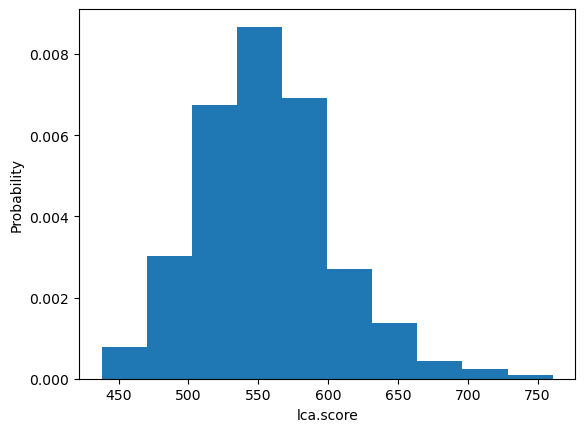

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# LCA calculations for model activity

db = bw.Database('S123_tech2_u')

act = [act for act in db if 'model' in act['name']][0]

print(act)

# quick LCA calculation
FU = {act: 1}
method = ('IPCC 2013', 'climate change', 'GWP 100a')
print('\nLCIA method: %s' % str(method))

lca = bw.LCA(FU, method)
lca.lci()
lca.lcia()
print('\nLCA score: %s' %lca.score)

print('\n>> MONTE CARLO ANALYSIS')
mc = bw.MonteCarloLCA(FU, method)  
iterations = 1000

from tqdm.notebook import tqdm

mc_results_FGu_BGu = []

for i in tqdm(range(iterations)):
    mc_results_FGu_BGu.append(next(mc))
    
print('Mean: %s' %np.mean(mc_results_FGu_BGu))
print('Median: %s' %np.median(mc_results_FGu_BGu))
print('Geometric mean: %s' %np.exp(np.mean(np.log(mc_results_FGu_BGu)))) 
print(pd.DataFrame(mc_results_FGu_BGu).describe())
print('LCA score: %s' %lca.score)

# plot the MC results
plt.hist(mc_results_FGu_BGu, density=True)
plt.ylabel("Probability")
plt.xlabel('lca.score')

### MC simulations FG without uncertainties (FGnu), background with uncertainties (BGu)

The calculations are performed for tech 2 only.

'model_S123_tech2_nu' (unit, GLO, None)

LCIA method: ('IPCC 2013', 'climate change', 'GWP 100a')

LCA score: 828.6349378918238

>> MONTE CARLO ANALYSIS


  0%|          | 0/1000 [00:00<?, ?it/s]

Mean: 932.2400404181003
Median: 927.864605005758
Geometric mean: 929.2510199691454
                 0
count  1000.000000
mean    932.240040
std      75.348944
min     737.224172
25%     881.478331
50%     927.864605
75%     976.244839
max    1198.308941
LCA score: 828.6349378918238


Text(0.5, 0, 'lca.score')

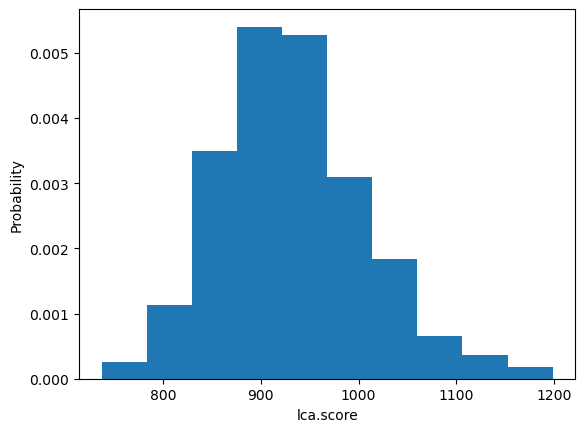

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# LCA calculations for model activity

db = bw.Database('S123_tech2_nu')

act = [act for act in db if 'model' in act['name']][0]

print(act)

# quick LCA calculation
FU = {act: 1}
method = ('IPCC 2013', 'climate change', 'GWP 100a')
print('\nLCIA method: %s' % str(method))

lca = bw.LCA(FU, method)
lca.lci()
lca.lcia()
print('\nLCA score: %s' %lca.score)

print('\n>> MONTE CARLO ANALYSIS')
mc = bw.MonteCarloLCA(FU, method)  
iterations = 1000

from tqdm.notebook import tqdm

mc_results_FGnu_BGu = []

for i in tqdm(range(iterations)):
    mc_results_FGnu_BGu.append(next(mc))
    
print('Mean: %s' %np.mean(mc_results_FGnu_BGu))
print('Median: %s' %np.median(mc_results_FGnu_BGu))
print('Geometric mean: %s' %np.exp(np.mean(np.log(mc_results_FGnu_BGu)))) 
print(pd.DataFrame(mc_results_FGnu_BGu).describe())
print('LCA score: %s' %lca.score)

# plot the MC results
plt.hist(mc_results_FGnu_BGu, density=True)
plt.ylabel("Probability")
plt.xlabel('lca.score')

In [25]:
for act in bw.Database('S123_tech2_u'):
    for exc in act.exchanges():
        print(exc.uncertainty)

{'uncertainty type': 2, 'loc': 3.7128174161735523, 'scale': 0.04358898943540673}
{'uncertainty type': 2, 'loc': 8.149024818245316, 'scale': 0.04358898943540673}
{'uncertainty type': 2, 'loc': -0.9026479836515104, 'scale': 0.034641016151377546}
{'uncertainty type': 2, 'loc': 3.6855710890343474, 'scale': 0.02449489742783178}
{'uncertainty type': 2, 'loc': 3.818405860244422, 'scale': 0.02449489742783178}
{'uncertainty type': 2, 'loc': -0.671694995958882, 'scale': 0.02449489742783178}
{'uncertainty type': 2, 'loc': -0.3894625282746658, 'scale': 0.02449489742783178}
{'uncertainty type': 2, 'loc': -1.168131882272773, 'scale': 0.02449489742783178}
{'uncertainty type': 2, 'loc': -0.1438703704197019, 'scale': 0.04358898943540673}
{'uncertainty type': 2, 'loc': -1.5791346075125237, 'scale': 0.034641016151377546}
{'uncertainty type': 2, 'loc': 5.291252453214126, 'scale': 0.034641016151377546}
{'uncertainty type': 2, 'loc': 6.005107295330627, 'scale': 0.034641016151377546}
{'uncertainty type': 2, 

## Comparison of the MC results with/without uncertainty in FG

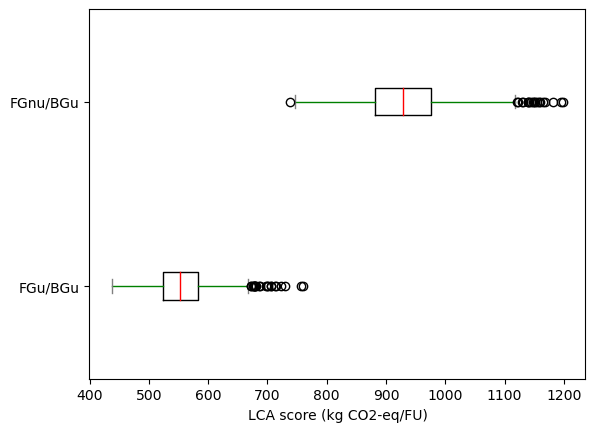

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a DataFrame with your data
df = pd.DataFrame({'FGu/BGu': mc_results_FGu_BGu, 'FGnu/BGu': mc_results_FGnu_BGu})

# Plot a vertical box plot with nice colors
boxplot = df.boxplot(column=['FGu/BGu', 'FGnu/BGu'], vert=False, grid = False, color=dict(boxes='black', whiskers='green', medians='red', caps='grey'))

# Rotate x-axis labels
plt.xticks(rotation=0)
plt.yticks(rotation=0)

# Set plot labels and title
plt.xlabel('LCA score (kg CO2-eq/FU)')
#plt.ylabel('Scenarios')
#plt.title('Horizontal box plot')

# Show the plot
plt.show()

## Remove the uncertainty from ecoinvent 3.6 cut-off and link the foreground databases

The uncertainty were removed from ecoinvent using Wurst and following the recent publication by Ayala et al. (2023). See other notebook => the ecoinvent without uncertainty was added to the same BW project.

### Create a version of ecoinvent 3.6 without uncertainties

Use Wurst to remove the uncertainty data in the ecoinvent database and export it as BW2 file.

In [27]:
import wurst as w

data = w.extract_brightway2_databases(['ecoinvent_3.6_cutoff'])

len(data)

Getting activity data


100%|██████████████████████████████████| 18121/18121 [00:00<00:00, 66341.14it/s]


Adding exchange data to activities


100%|████████████████████████████████| 615644/615644 [00:25<00:00, 24125.61it/s]


Filling out exchange data


100%|██████████████████████████████████| 18121/18121 [00:01<00:00, 10656.95it/s]


18121

In [28]:
for i in range(len(data)):
    for j in range(len(data[i]['exchanges'])):
        data[i]['exchanges'][j]['uncertainty type'] = 0    

In [29]:
ei_no_uncert_name = 'ecoinvent_3.6_cutoff_no_uncert'

if ei_no_uncert_name in bw.databases: 
    print('The database %s already exists. Deleting it.' %ei_no_uncert_name)
    del bw.databases[ei_no_uncert_name]

w.write_brightway2_database(data, ei_no_uncert_name)

18121 datasets
615644 exchanges
0 unlinked exchanges
  


Writing activities to SQLite3 database:
0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:24


Title: Writing activities to SQLite3 database:
  Started: 05/14/2024 14:36:11
  Finished: 05/14/2024 14:36:35
  Total time elapsed: 00:00:24
  CPU %: 100.00
  Memory %: 32.38
Created database: ecoinvent_3.6_cutoff_no_uncert


### Link the foreground databases to the new version of ecoinvent without uncertainties

Copy the foreground databases and link them to ecoinvent 3.6 cutoff without uncertainties.

In [30]:
list(bw.databases)

['biosphere3',
 'ecoinvent_3.6_cutoff',
 'db_S1tech_1',
 'db_S1tech_2',
 'db_S2tech_1',
 'db_S2tech_2',
 'db_S3tech_1',
 'db_S3tech_2',
 'db_transport_S12tech_1',
 'db_transport_S12tech_2',
 'db_transport_S23tech_1',
 'db_transport_S23tech_2',
 'db_infrastructurestech_1',
 'db_infrastructurestech_2',
 'db_operationtech_1',
 'db_operationtech_2',
 'db_S1tech_1_uncert',
 'db_S1tech_2_uncert',
 'db_S2tech_1_uncert',
 'db_S2tech_2_uncert',
 'db_S3tech_1_uncert',
 'db_S3tech_2_uncert',
 'db_transport_S12tech_1_uncert',
 'db_transport_S12tech_2_uncert',
 'db_transport_S23tech_1_uncert',
 'db_transport_S23tech_2_uncert',
 'db_infrastructurestech_1_uncert',
 'db_infrastructurestech_2_uncert',
 'db_operationtech_1_uncert',
 'db_operationtech_2_uncert',
 'S123_tech1_u',
 'S123_tech2_u',
 'S123_tech1_nu',
 'S123_tech2_nu',
 'ecoinvent_3.6_cutoff_no_uncert']

In [31]:
# make a copy of the S1232 databases
for aggregated_db_name in fg_db_dict.keys():
    
    original_db = bw.Database(aggregated_db_name) # original database link to ei36
    
    if str(aggregated_db_name + '_nbu') in bw.databases:
        del bw.databases[str(aggregated_db_name + '_nbu')]
    
    new_db = original_db.copy(str(aggregated_db_name + '_nbu')) # no background uncertainty
    
    new_db_data = new_db.load()
    
    for key, ds in new_db_data.items():
        for exc in ds.get('exchanges', []):
            if exc['input'][0] == 'ecoinvent_3.6_cutoff':
                exc['input'] = ('ecoinvent_3.6_cutoff_no_uncert', exc['input'][1])
                
    new_db.write(new_db_data)
    new_db.process()

Writing activities to SQLite3 database:
0% [#] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00
Writing activities to SQLite3 database:


Title: Writing activities to SQLite3 database:
  Started: 05/14/2024 14:38:10
  Finished: 05/14/2024 14:38:10
  Total time elapsed: 00:00:00
  CPU %: 0.00
  Memory %: 32.51


0% [#] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00
Writing activities to SQLite3 database:


Title: Writing activities to SQLite3 database:
  Started: 05/14/2024 14:38:11
  Finished: 05/14/2024 14:38:11
  Total time elapsed: 00:00:00
  CPU %: 723.60
  Memory %: 32.51


0% [#] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00
Writing activities to SQLite3 database:


Title: Writing activities to SQLite3 database:
  Started: 05/14/2024 14:38:11
  Finished: 05/14/2024 14:38:11
  Total time elapsed: 00:00:00
  CPU %: 0.00
  Memory %: 32.51


0% [#] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


Title: Writing activities to SQLite3 database:
  Started: 05/14/2024 14:38:11
  Finished: 05/14/2024 14:38:11
  Total time elapsed: 00:00:00
  CPU %: 0.00
  Memory %: 32.51


Writing activities to SQLite3 database:
0% [#] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


Title: Writing activities to SQLite3 database:
  Started: 05/14/2024 14:38:11
  Finished: 05/14/2024 14:38:11
  Total time elapsed: 00:00:00
  CPU %: 0.00
  Memory %: 32.51


Writing activities to SQLite3 database:
0% [#] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00
Writing activities to SQLite3 database:


Title: Writing activities to SQLite3 database:
  Started: 05/14/2024 14:38:11
  Finished: 05/14/2024 14:38:11
  Total time elapsed: 00:00:00
  CPU %: 0.00
  Memory %: 32.51


0% [#] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


Title: Writing activities to SQLite3 database:
  Started: 05/14/2024 14:38:11
  Finished: 05/14/2024 14:38:11
  Total time elapsed: 00:00:00
  CPU %: 737.10
  Memory %: 32.51


Writing activities to SQLite3 database:
0% [#] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


Title: Writing activities to SQLite3 database:
  Started: 05/14/2024 14:38:11
  Finished: 05/14/2024 14:38:11
  Total time elapsed: 00:00:00
  CPU %: 0.00
  Memory %: 32.51


In [32]:
# check that the uncertainty was added and that the database was switched to ei36 without uncertainties
for db in bw.databases:
    if 'nu_nbu' and 'u_nbu' in db:
        print(db)
        for act in bw.Database(db):
            print(act)
            for exc in act.exchanges():
                print(exc.uncertainty)
                print(exc['input'][0])

S123_tech1_u_nbu
'model_S123_tech1_u' (unit, GLO, None)
{'uncertainty type': 2, 'loc': -1.5791346075125237, 'scale': 0.034641016151377546}
ecoinvent_3.6_cutoff_no_uncert
{'uncertainty type': 2, 'loc': 3.642937421414721, 'scale': 0.034641016151377546}
ecoinvent_3.6_cutoff_no_uncert
{'uncertainty type': 2, 'loc': 8.149024818245316, 'scale': 0.034641016151377546}
ecoinvent_3.6_cutoff_no_uncert
{'uncertainty type': 2, 'loc': 4.796701142737361, 'scale': 0.02449489742783178}
ecoinvent_3.6_cutoff_no_uncert
{'uncertainty type': 2, 'loc': 3.040210442982877, 'scale': 0.02449489742783178}
ecoinvent_3.6_cutoff_no_uncert
{'uncertainty type': 2, 'loc': -0.3168772092581916, 'scale': 0.02449489742783178}
ecoinvent_3.6_cutoff_no_uncert
{'uncertainty type': 2, 'loc': -0.031612594564940075, 'scale': 0.02449489742783178}
ecoinvent_3.6_cutoff_no_uncert
{'uncertainty type': 2, 'loc': -0.7247597751248854, 'scale': 0.02449489742783178}
ecoinvent_3.6_cutoff_no_uncert
{'uncertainty type': 2, 'loc': -0.925076676

## Perform an uncertainty analysis for FG with or without uncert. + BG without uncert.

'model_S123_tech2_u' (unit, GLO, None)

LCIA method: ('IPCC 2013', 'climate change', 'GWP 100a')

LCA score: 828.6349378918248

>> MONTE CARLO ANALYSIS


  0%|          | 0/1000 [00:00<?, ?it/s]

Mean: 487.6836572751376
Median: 487.1287389233348
Geometric mean: 487.60979329525094
                 0
count  1000.000000
mean    487.683657
std       8.499608
min     462.060357
25%     482.053941
50%     487.128739
75%     493.401692
max     519.322675
LCA score: 828.6349378918248


Text(0.5, 0, 'lca.score')

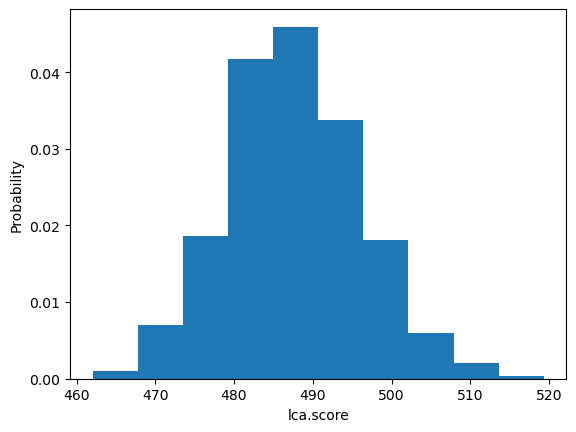

In [33]:
import numpy as np
import matplotlib.pyplot as plt

# LCA calculations for model activity

db = bw.Database('S123_tech2_u_nbu')

act = [act for act in db if 'model' in act['name']][0]

print(act)

# quick LCA calculation
FU = {act: 1}
method = ('IPCC 2013', 'climate change', 'GWP 100a')
print('\nLCIA method: %s' % str(method))

lca = bw.LCA(FU, method)
lca.lci()
lca.lcia()
print('\nLCA score: %s' %lca.score)

print('\n>> MONTE CARLO ANALYSIS')
mc = bw.MonteCarloLCA(FU, method)  
iterations = 1000

from tqdm.notebook import tqdm

mc_results_FGu_BGnu = []

for i in tqdm(range(iterations)):
    mc_results_FGu_BGnu.append(next(mc))
    
print('Mean: %s' %np.mean(mc_results_FGu_BGnu))
print('Median: %s' %np.median(mc_results_FGu_BGnu))
print('Geometric mean: %s' %np.exp(np.mean(np.log(mc_results_FGu_BGnu)))) 
print(pd.DataFrame(mc_results_FGu_BGnu).describe())
print('LCA score: %s' %lca.score)

# plot the MC results
plt.hist(mc_results_FGu_BGnu, density=True)
plt.ylabel("Probability")
plt.xlabel('lca.score')

'model_S123_tech2_nu' (unit, GLO, None)

LCIA method: ('IPCC 2013', 'climate change', 'GWP 100a')

LCA score: 828.6349378918248

>> MONTE CARLO ANALYSIS


  0%|          | 0/1000 [00:00<?, ?it/s]

Mean: 828.6349378918246
Median: 828.6349378918248
Geometric mean: 828.6349378918263
                  0
count  1.000000e+03
mean   8.286349e+02
std    2.274874e-13
min    8.286349e+02
25%    8.286349e+02
50%    8.286349e+02
75%    8.286349e+02
max    8.286349e+02
LCA score: 828.6349378918248


Text(0.5, 0, 'lca.score')

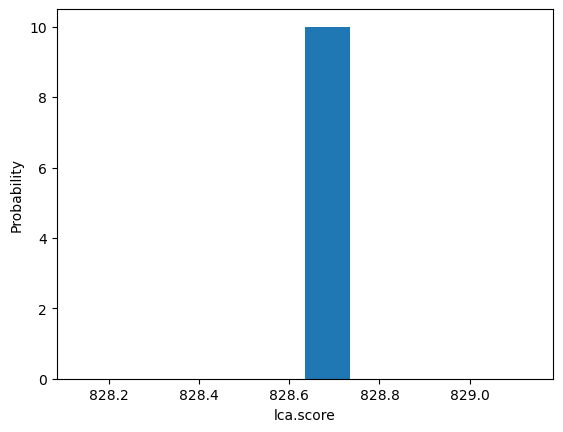

In [34]:
import numpy as np
import matplotlib.pyplot as plt

# LCA calculations for model activity

db = bw.Database('S123_tech2_nu_nbu')

act = [act for act in db if 'model' in act['name']][0]

print(act)

# quick LCA calculation
FU = {act: 1}
method = ('IPCC 2013', 'climate change', 'GWP 100a')
print('\nLCIA method: %s' % str(method))

lca = bw.LCA(FU, method)
lca.lci()
lca.lcia()
print('\nLCA score: %s' %lca.score)

print('\n>> MONTE CARLO ANALYSIS')
mc = bw.MonteCarloLCA(FU, method)  
iterations = 1000

from tqdm.notebook import tqdm

mc_results_FGnu_BGnu = []

for i in tqdm(range(iterations)):
    mc_results_FGnu_BGnu.append(next(mc))
    
print('Mean: %s' %np.mean(mc_results_FGnu_BGnu))
print('Median: %s' %np.median(mc_results_FGnu_BGnu))
print('Geometric mean: %s' %np.exp(np.mean(np.log(mc_results_FGnu_BGnu)))) 
print(pd.DataFrame(mc_results_FGnu_BGnu).describe())
print('LCA score: %s' %lca.score)

# plot the MC results
plt.hist(mc_results_FGnu_BGnu, density=True)
plt.ylabel("Probability")
plt.xlabel('lca.score')

## Compare the four scenarios: FG + BG with/without uncertainty

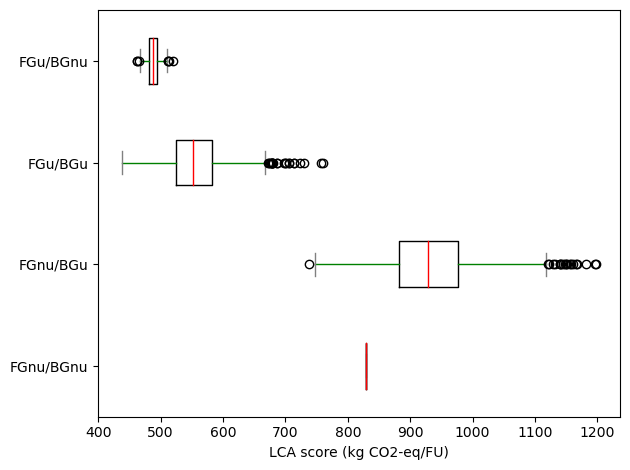

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a DataFrame with your data
df = pd.DataFrame({'FGu/BGu': mc_results_FGu_BGu, 'FGnu/BGu': mc_results_FGnu_BGu, 'FGu/BGnu': mc_results_FGu_BGnu, 'FGnu/BGnu': mc_results_FGnu_BGnu,})

# Plot a vertical box plot with nice colors
boxplot = df.boxplot(column=['FGnu/BGnu', 'FGnu/BGu', 'FGu/BGu', 'FGu/BGnu'], vert=False, grid = False, color=dict(boxes='black', whiskers='green', medians='red', caps='grey'))

# Rotate x-axis labels
plt.xticks(rotation=0)
plt.yticks(rotation=0)

# Set plot labels and title
plt.xlabel('LCA score (kg CO2-eq/FU)')
#plt.ylabel('Scenarios')
#plt.title('Horizontal box plot')
plt.tight_layout()
plt.savefig(str(wdir+'/results/uncertainty_BGvsFG.pdf'))

# Show the plot
plt.show()

### Compare period 1 vs period 2 with uncertainties

'model_S123_tech1_u' (unit, GLO, None)

LCIA method: ('IPCC 2013', 'climate change', 'GWP 100a')

LCA score: 970.142068369913

>> MONTE CARLO ANALYSIS


  0%|          | 0/1000 [00:00<?, ?it/s]

Mean: 671.8862173338094
Median: 665.8569058671063
Geometric mean: 668.5847686947786
                 0
count  1000.000000
mean    671.886217
std      67.813217
min     514.263354
25%     622.807126
50%     665.856906
75%     710.807389
max    1074.124096
LCA score: 970.142068369913


Text(0.5, 0, 'lca.score')

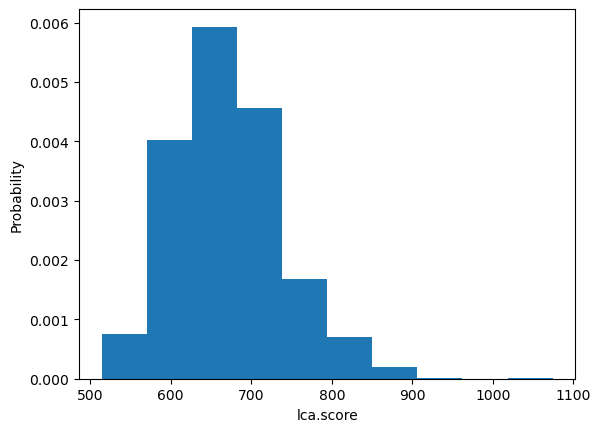

In [36]:
import numpy as np
import matplotlib.pyplot as plt

# LCA calculations for model activity

db = bw.Database('S123_tech1_u')

act = [act for act in db if 'model' in act['name']][0]

print(act)

# quick LCA calculation
FU = {act: 1}
method = ('IPCC 2013', 'climate change', 'GWP 100a')
print('\nLCIA method: %s' % str(method))

lca = bw.LCA(FU, method)
lca.lci()
lca.lcia()
print('\nLCA score: %s' %lca.score)

print('\n>> MONTE CARLO ANALYSIS')
mc = bw.MonteCarloLCA(FU, method)  
iterations = 1000

from tqdm.notebook import tqdm

mc_results_FGu_BGu_P1 = []

for i in tqdm(range(iterations)):
    mc_results_FGu_BGu_P1.append(next(mc))
    
print('Mean: %s' %np.mean(mc_results_FGu_BGu_P1))
print('Median: %s' %np.median(mc_results_FGu_BGu_P1))
print('Geometric mean: %s' %np.exp(np.mean(np.log(mc_results_FGu_BGu_P1)))) 
print(pd.DataFrame(mc_results_FGu_BGu_P1).describe())
print('LCA score: %s' %lca.score)

# plot the MC results
plt.hist(mc_results_FGu_BGu_P1, density=True)
plt.ylabel("Probability")
plt.xlabel('lca.score')

'model_S123_tech1_nu' (unit, GLO, None)

LCIA method: ('IPCC 2013', 'climate change', 'GWP 100a')

LCA score: 970.142068369913

>> MONTE CARLO ANALYSIS


  0%|          | 0/1000 [00:00<?, ?it/s]

Mean: 1102.5535012424018
Median: 1095.2739951826948
Geometric mean: 1098.5602899148664
                 0
count  1000.000000
mean   1102.553501
std      95.061320
min     866.965147
25%    1037.029894
50%    1095.273995
75%    1159.108910
max    1488.201667
LCA score: 970.142068369913


Text(0.5, 0, 'lca.score')

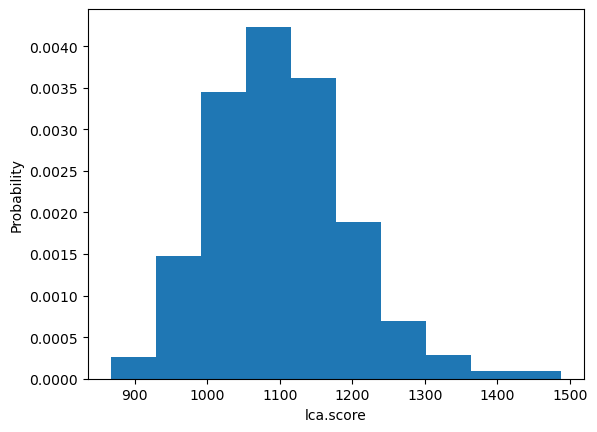

In [38]:
import numpy as np
import matplotlib.pyplot as plt

# LCA calculations for model activity

db = bw.Database('S123_tech1_nu')

act = [act for act in db if 'model' in act['name']][0]

print(act)

# quick LCA calculation
FU = {act: 1}
method = ('IPCC 2013', 'climate change', 'GWP 100a')
print('\nLCIA method: %s' % str(method))

lca = bw.LCA(FU, method)
lca.lci()
lca.lcia()
print('\nLCA score: %s' %lca.score)

print('\n>> MONTE CARLO ANALYSIS')
mc = bw.MonteCarloLCA(FU, method)  
iterations = 1000

from tqdm.notebook import tqdm

mc_results_FGnu_BGu_P1 = []

for i in tqdm(range(iterations)):
    mc_results_FGnu_BGu_P1.append(next(mc))
    
print('Mean: %s' %np.mean(mc_results_FGnu_BGu_P1))
print('Median: %s' %np.median(mc_results_FGnu_BGu_P1))
print('Geometric mean: %s' %np.exp(np.mean(np.log(mc_results_FGnu_BGu_P1)))) 
print(pd.DataFrame(mc_results_FGnu_BGu_P1).describe())
print('LCA score: %s' %lca.score)

# plot the MC results
plt.hist(mc_results_FGnu_BGu_P1, density=True)
plt.ylabel("Probability")
plt.xlabel('lca.score')

'model_S123_tech1_u' (unit, GLO, None)

LCIA method: ('IPCC 2013', 'climate change', 'GWP 100a')

LCA score: 970.14206836989

>> MONTE CARLO ANALYSIS


  0%|          | 0/1000 [00:00<?, ?it/s]

Mean: 576.847268054632
Median: 576.8430833781499
Geometric mean: 576.7525682943871
                 0
count  1000.000000
mean    576.847268
std      10.459098
min     540.389682
25%     569.543694
50%     576.843083
75%     583.935088
max     609.041658
LCA score: 970.14206836989


Text(0.5, 0, 'lca.score')

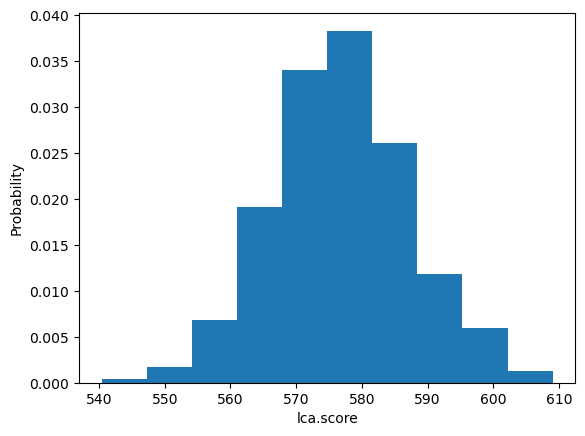

In [39]:
import numpy as np
import matplotlib.pyplot as plt

# LCA calculations for model activity

db = bw.Database('S123_tech1_u_nbu')

act = [act for act in db if 'model' in act['name']][0]

print(act)

# quick LCA calculation
FU = {act: 1}
method = ('IPCC 2013', 'climate change', 'GWP 100a')
print('\nLCIA method: %s' % str(method))

lca = bw.LCA(FU, method)
lca.lci()
lca.lcia()
print('\nLCA score: %s' %lca.score)

print('\n>> MONTE CARLO ANALYSIS')
mc = bw.MonteCarloLCA(FU, method)  
iterations = 1000

from tqdm.notebook import tqdm

mc_results_FGu_BGnu_P1 = []

for i in tqdm(range(iterations)):
    mc_results_FGu_BGnu_P1.append(next(mc))
    
print('Mean: %s' %np.mean(mc_results_FGu_BGnu_P1))
print('Median: %s' %np.median(mc_results_FGu_BGnu_P1))
print('Geometric mean: %s' %np.exp(np.mean(np.log(mc_results_FGu_BGnu_P1)))) 
print(pd.DataFrame(mc_results_FGu_BGnu_P1).describe())
print('LCA score: %s' %lca.score)

# plot the MC results
plt.hist(mc_results_FGu_BGnu_P1, density=True)
plt.ylabel("Probability")
plt.xlabel('lca.score')

'model_S123_tech1_nu' (unit, GLO, None)

LCIA method: ('IPCC 2013', 'climate change', 'GWP 100a')

LCA score: 970.14206836989

>> MONTE CARLO ANALYSIS


  0%|          | 0/1000 [00:00<?, ?it/s]

Mean: 970.1420683698904
Median: 970.14206836989
Geometric mean: 970.1420683698863
                  0
count  1.000000e+03
mean   9.701421e+02
std    3.412312e-13
min    9.701421e+02
25%    9.701421e+02
50%    9.701421e+02
75%    9.701421e+02
max    9.701421e+02
LCA score: 970.14206836989


Text(0.5, 0, 'lca.score')

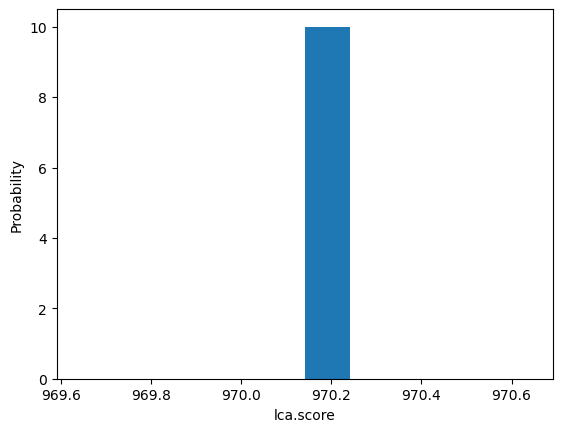

In [40]:
import numpy as np
import matplotlib.pyplot as plt

# LCA calculations for model activity

db = bw.Database('S123_tech1_nu_nbu')

act = [act for act in db if 'model' in act['name']][0]

print(act)

# quick LCA calculation
FU = {act: 1}
method = ('IPCC 2013', 'climate change', 'GWP 100a')
print('\nLCIA method: %s' % str(method))

lca = bw.LCA(FU, method)
lca.lci()
lca.lcia()
print('\nLCA score: %s' %lca.score)

print('\n>> MONTE CARLO ANALYSIS')
mc = bw.MonteCarloLCA(FU, method)  
iterations = 1000

from tqdm.notebook import tqdm

mc_results_FGnu_BGnu_P1 = []

for i in tqdm(range(iterations)):
    mc_results_FGnu_BGnu_P1.append(next(mc))
    
print('Mean: %s' %np.mean(mc_results_FGnu_BGnu_P1))
print('Median: %s' %np.median(mc_results_FGnu_BGnu_P1))
print('Geometric mean: %s' %np.exp(np.mean(np.log(mc_results_FGnu_BGnu_P1)))) 
print(pd.DataFrame(mc_results_FGnu_BGnu_P1).describe())
print('LCA score: %s' %lca.score)

# plot the MC results
plt.hist(mc_results_FGnu_BGnu_P1, density=True)
plt.ylabel("Probability")
plt.xlabel('lca.score')

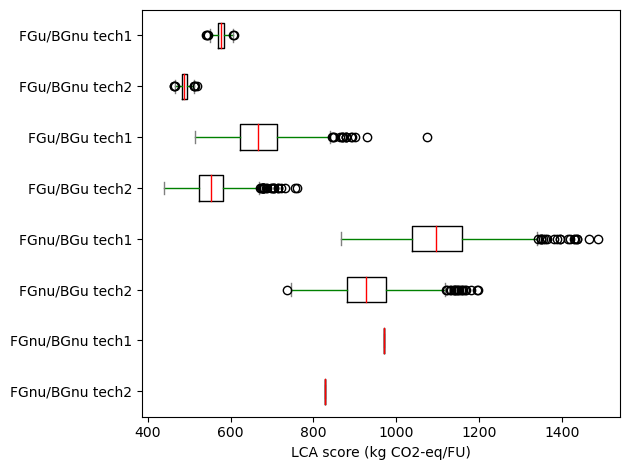

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a DataFrame with your data
df = pd.DataFrame({'FGu/BGu tech1': mc_results_FGu_BGu_P1, 
                   'FGnu/BGu tech1': mc_results_FGnu_BGu_P1, 
                   'FGu/BGnu tech1': mc_results_FGu_BGnu_P1, 
                   'FGnu/BGnu tech1': mc_results_FGnu_BGnu_P1,
                   'FGu/BGu tech2': mc_results_FGu_BGu, 
                   'FGnu/BGu tech2': mc_results_FGnu_BGu, 
                   'FGu/BGnu tech2': mc_results_FGu_BGnu, 
                   'FGnu/BGnu tech2': mc_results_FGnu_BGnu})

# Plot a vertical box plot with nice colors
boxplot = df.boxplot(column=['FGnu/BGnu tech2', 'FGnu/BGnu tech1', 'FGnu/BGu tech2', 'FGnu/BGu tech1', 'FGu/BGu tech2', 'FGu/BGu tech1', 'FGu/BGnu tech2', 'FGu/BGnu tech1'], vert=False, grid = False, color=dict(boxes='black', whiskers='green', medians='red', caps='grey'))


# Rotate x-axis labels
plt.xticks(rotation=0)
plt.yticks(rotation=0)

# Set plot labels and title
plt.xlabel('LCA score (kg CO2-eq/FU)')
#plt.ylabel('Scenarios')
#plt.title('Horizontal box plot')
plt.tight_layout()

plt.savefig(str(wdir+'/results/uncertainty_BGvsFG_P1vsP2.pdf'))

# Show the plot
plt.show()